<img style="float: right; margin: auto;" src="https://www.ambulante.org/wp-content/uploads/2019/03/logos_web_Jalisco_ITESOJesuita.png" width="350" height="220" />
    
# <span style="color:green">     <font size="8"> A New Business Opportunity


<span style="color:green"> <font size="4">  *Simulación de Procesos Financieros: Proyecto I*

<b> <p style = "font-family: Palatino; font-size:2em; color: green;" > Daphne Hernández | Paloma Martínez | Oscar Flores </p> <b/>

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Este proyecto se basa en el análisis de datos obtenidos por las ventas de una compañía de productos relacionados con la nutrición, el control de peso, las dietas deportivas y el cuidado personal. Además, se buscará encontrar el comportamiento de las nuevas personas, que se encuentren en situación similar a alguna que ya existe en el negocio. </p>
    
### 1.2 Objetivos:

> #### 1.2.1 Objetivo General:
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> Analizar el comportamiento y compra de producto de los nuevos distribuidores en sus siguientes tres meses en base al comportamiento de los distribuidores ya existentes. </p>
>
> #### 1.2.2 Objetivos específicos:
>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;">  * De acuerdo a cada país, realizar una comparación de su productividad total. </p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Separar el volumen total de acuerdo al género del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Analizar las diferencias de comportamiento de acuerdo a la edad del distribuidor.</p>
> <p style = "font-family: Calibri Light; font-size:1.3em;color:black;"> * Dependiendo de su equipo, examinar las compras de los distribuidores. </p>

### 1.3 Definición del problema:

<p style = "font-family: Calibri Light; font-size:1.3em; color:black; text-align: justify">  Para meterlos un poco en contexto, Herbalife es una compañía de venta directa establecida a nivel global, proporcionan productos innovadores nutricionales con respaldo científico. Actualmente cubren clientes en alrededor de 90 países. Ofrecen también una oportunidad de negocio individual. El problema principal que tiene esta empresa Herbalife es que no tienen idea de como se van a comportar sus ventas en un futuro. Sus ventas son tan volátiles y abarcan tanto mercado en el mundo, que no han logrado definir en que país se vende más, o cual es el perfil de vendedor ideal para poderse enfocar más en ellos. Cuando investigamos sobre esta empresa multinivel nos dimos cuenta que querían aumentar sus ventas en línea impulsando el e-commerce e invirtiendo en las redes sociales. Concluimos que para hacer esto, la empresa tiene que tener muy definido su nicho de mercado y sus países líderes para no querer acaparar al mundo entero. Si Herbalife quiere invertir en el e-commerce nosotros les podremos ayudar a modelar sus ganancias para ver cuanto dinero podrían invertir en esta área, así como en otras y principalmente, obvservar el comportamiento de los distribuidores que entren al negocio, y simular su comportamiento y encontrar su máximo desempeño, dependiendo de la información de los distribuidores con características similares.

### 1.4 Nodos y Variables a simular

<p style = "font-family: Calibri Light; font-size:1.2em;color:black;"> Dentro de nuestra base de datos, encontramos 4 nodos a simular:
    
   * El país donde se encontrará registrado el distribuidor
   * El género del distribuidor
   * La edad del distribuidor en tiempo 0
   * El equipo del distribuidor (mientras mejor equipo, más beneficios se obtienen)
   * Los puntos de compra del distribuidor
    
    


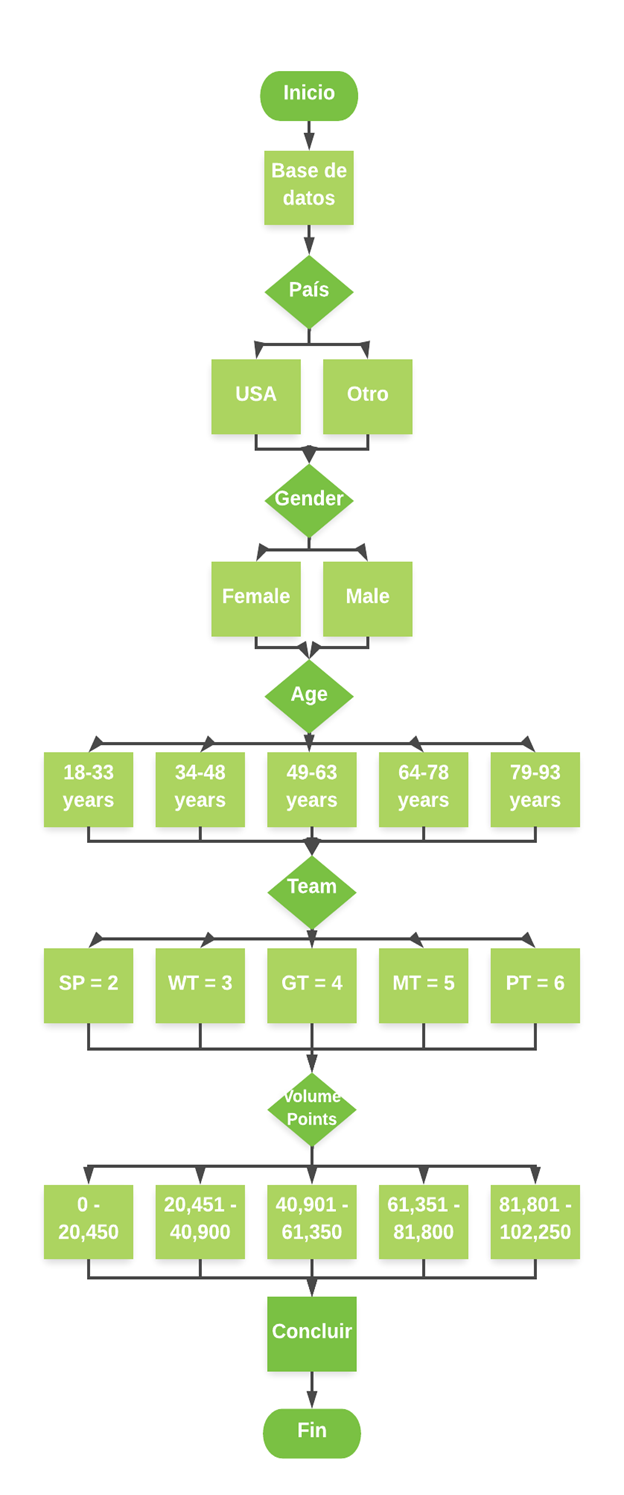

### 1.6 Obtención de la base de datos

In [4]:
import pandas as pd

DB = pd.read_excel("Base de Datos.xlsx")

DB.head()

,Distributor,Age,Gender,Country,Team,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
0,1,53,Male,Jamaica,PT,3009.62,3008.97,3011.50
1,2,63,Female,Canada,PT,9074.20,10069.50,5252.84
2,3,60,Female,Canada,PT,6849.17,8358.40,11171.80
3,4,68,Male,Canada,MT,3029.77,2679.03,2519.80
4,5,68,Female,Canada,MT,2505.15,2506.15,2502.25
